In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense, Dropout, LeakyReLU
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

Загрусим данные ***y*** для создание StandartScale

In [10]:
import pandas as pd
y_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_data.csv')
y = y_data['P'].values

In [11]:
from sklearn.preprocessing import StandardScaler
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(y.reshape(-1,1))

In [12]:
X_scaled = np.load('/content/drive/MyDrive/Colab Notebooks/X_scaled.npy')
#y_scaled = np.load('/content/drive/MyDrive/Colab Notebooks/y_scaled_P.npy')

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(30492, 6300)
(30492, 1)


In [ ]:
print(y_scaled)

[[-0.37710604]
 [-0.37710604]
 [ 0.89457332]
 ...
 [ 0.33589865]
 [-0.0653594 ]
 [-0.0653594 ]]


Добавление размерности к данным

In [ ]:
X_train_reshaped = np.expand_dims(X_train, axis=2)
X_valid_reshaped = np.expand_dims(X_valid, axis=2)
X_test_reshaped = np.expand_dims(X_test, axis=2)

In [14]:
def getModel(input_shape, num_classes):
  model = Sequential()
  model.add(Conv1D(filters=96, kernel_size=11, strides=4, padding='valid', activation=LeakyReLU(alpha=0.1), input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=3))
  model.add(Conv1D(filters=256, kernel_size=5, strides=1, padding='valid', activation=LeakyReLU(alpha=0.1)))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=3))
  model.add(Conv1D(filters=384, kernel_size=3, strides=1, padding='valid', activation=LeakyReLU(alpha=0.1)))
  model.add(BatchNormalization())
  model.add(Conv1D(filters=384, kernel_size=3, strides=1, padding='valid', activation=LeakyReLU(alpha=0.1)))
  model.add(BatchNormalization())
  model.add(Conv1D(filters=256, kernel_size=3, strides=1, padding='valid', activation=LeakyReLU(alpha=0.1)))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=3))
  model.add(Flatten())
  model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
  model.add(Dropout(0.42))
  model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
  model.add(Dropout(0.42))
  model.add(Dense(num_classes, activation='linear'))
  return model


In [15]:
input_shape = (6300,1)
num_classes = 1

my_model = getModel(input_shape, num_classes)
my_model.compile(optimizer=Adam(learning_rate=1e-5), loss='mean_squared_error', metrics=['msle'])

In [16]:
# Размер батча
batch_size = 16
# Количество эпох обучения
epochs = 200

# Обучение модели
history = my_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid,y_valid), verbose=1)

Epoch 1/200
  68/1906 [>.............................] - ETA: 22:18 - loss: 2.3056 - msle: 0.2805

KeyboardInterrupt: 

In [ ]:
my_model.save('/content/drive/MyDrive/Colab Notebooks/my_model_msle_pH.keras')

In [ ]:
from sklearn.metrics import r2_score
y_pred = my_model.predict(X_test)
# Вычислите R²
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2}')

205/205 [==============================] - 3s 10ms/step
R² Score: 0.8377958670490822


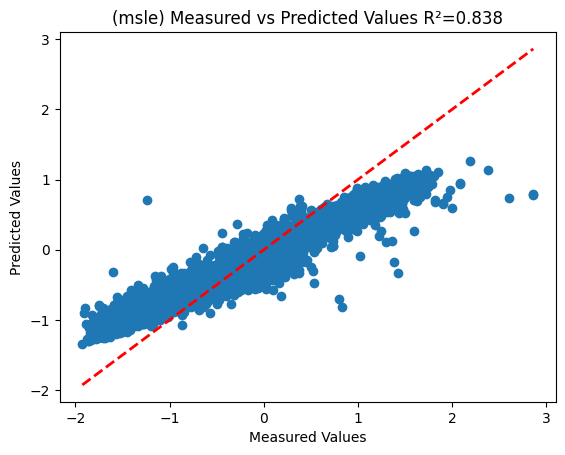

In [ ]:
import matplotlib.pyplot as plt

# Постройте график
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Measured Values')
plt.ylabel('Predicted Values')
plt.title('(msle) Measured vs Predicted Values R²='+str(np.round(r2,3)))
plt.show()

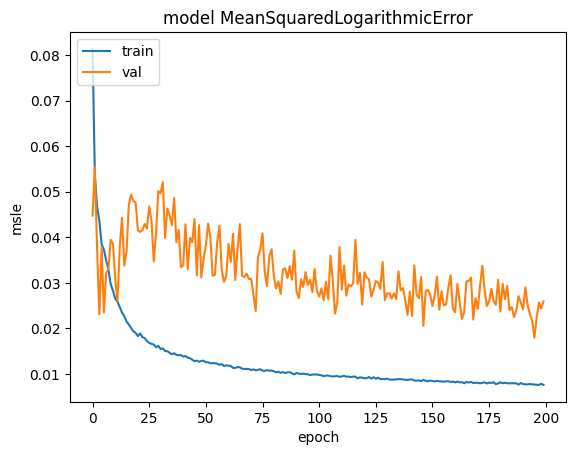

In [ ]:
import keras
plt.plot(history.history['msle'])
plt.plot(history.history['val_msle'])
plt.title('model MeanSquaredLogarithmicError')
plt.ylabel('msle')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

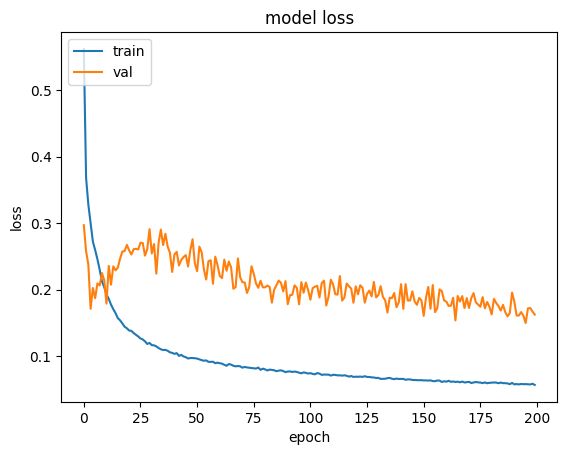

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

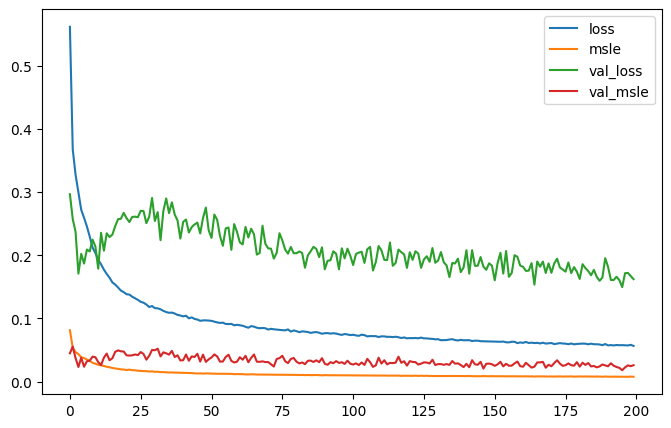

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
print(y_pred)

[[-1.044797  ]
 [-0.52814853]
 [-0.7256113 ]
 ...
 [-0.767398  ]
 [ 0.6342072 ]
 [ 0.571326  ]]
